## Final Project Submission

Please fill out:
* Student name: Brenda Chepkorir Mutai
* Student pace: full time
* Scheduled project review date/time: 28/5/2023
* Instructor name: Mark Tiba
* Blog post URL:


MOVIE ANALYSIS

1.Overview

This is an overview of Microsoft Movie analysis aspect that involves analyzing various aspects and key areas like the business problems, data, methods, results and recommendations. In this project we would at the perfomance and the revenue, the movies and the most successful movies over the recent years. Microsoft may use this analysis to boost their perfomances.




2.Business Understanding

Microsoft business is trying to understand better their audiences and deliver better results. They also want to have a better understanding of their clientele.


3.Data Understanding

These project has data sets that we are going to focus on. These are online database of information affiliated to film making and various entertainment and are  website that provides data and revenue on a daily basis in a systematic way. These data will provide various information like the gross, movie perfomance, ratings, writers and producers.

4.Data Preparation

We will read and import the data set from a CSV file. Both data sets will provide us with valuable information regarding box office performance, movie ratings, writers, and producers. Additionally, we will thoroughly examine and comprehend the given data set.

In [3]:
#import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 

In [4]:
#import various csv data set using pandas
bom_movies = pd.read_csv("bom.movie_gross.csv")
tmdb_movies = pd.read_csv("tmdb.movies.csv") 
title_ratings = pd.read_csv("title.ratings.csv")
title_principals =pd.read_csv("title.principals.csv")

In [5]:
bom_movies.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:
bom_movies.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [8]:
#Checking the tmdb movie data set
tmdb_movies.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [9]:
tmdb_movies.shape

(26517, 10)

In [10]:
#checking the title ratings data set
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
#checking the title principals data
title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


5.Data Cleaning

This prepares the data and addresses the issues identified during the discovery phase. This addresses the outliers, missing values,  duplicated rows, merges and invalid data. This process will ensure that we have accurate, reliable, consistent and valid data.

In [12]:
#Checking the missing values
def check_missing_values (df):
    missing_values = df.isnull().sum()
    print (f"There are {missing_values} missing values")

a. bom_movies

In [13]:
df =pd.read_csv("bom.movie_gross.csv")
check_missing_values(df)

There are title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64 missing values


In [14]:
#dropping the rows with miss values
df.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'], inplace=True)

In [15]:
#confirm that there are no missing values 
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


b. tmdb movies

In [16]:
df =pd.read_csv("tmdb.movies.csv")
check_missing_values(df)

There are Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64 missing values


c. title ratings

In [17]:
df =pd.read_csv("title.ratings.csv")
check_missing_values(df)

There are tconst           0
averagerating    0
numvotes         0
dtype: int64 missing values


d. title principals

In [18]:
df =pd.read_csv("title.principals.csv")
check_missing_values(df)

There are tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64 missing values


In [19]:
#replacing the missing values of characters and job
df['characters'] = df['characters'].fillna('Unknown')
df['job'] = df['job'].fillna('Unknown')

In [20]:
#confirming the values have been replaced
title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


6.Data Analysis

Data analysis access the data and gives the way forward in giving effective solutions to the business. The data shows what the business should maintain and also reviews give a good alternative in changing the business objectives.
It can be used to determine various things from the dataset for example most watched movies, ratings or most populars genres.

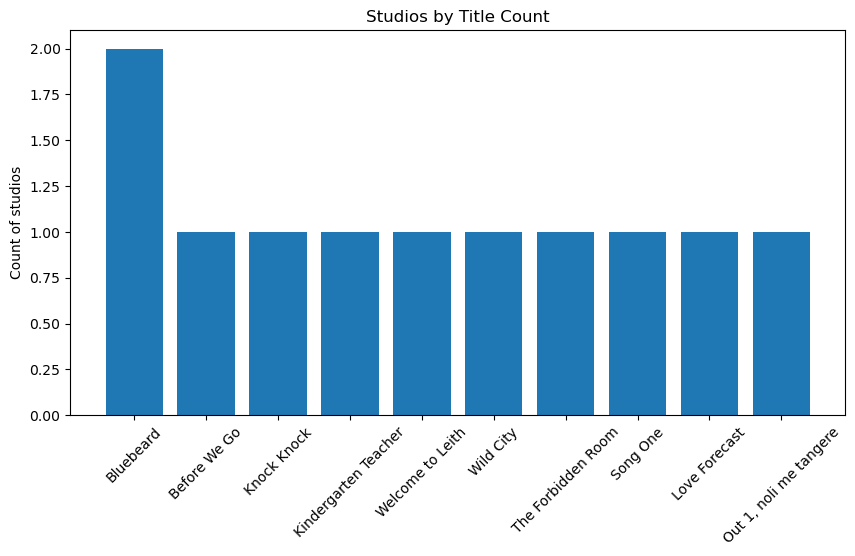

In [48]:
#most popular movie titles
value_counts = bom_movies["title"].value_counts()
top_10_counts = value_counts.iloc[:10]

# Set up the figure and subplots
fig, ax= plt.subplots(figsize=(10,5))

# Plot the top 10 studios
x = np.arange(len(top_10_counts))
ax.bar(x, top_10_counts.values)
ax.set_xticks(x)
ax.set_xticklabels(top_10_counts.index, rotation=45)
ax.set_ylabel("Count of studios")
ax.set_title("Studios by Title Count")

# Display the plots
plt.show()

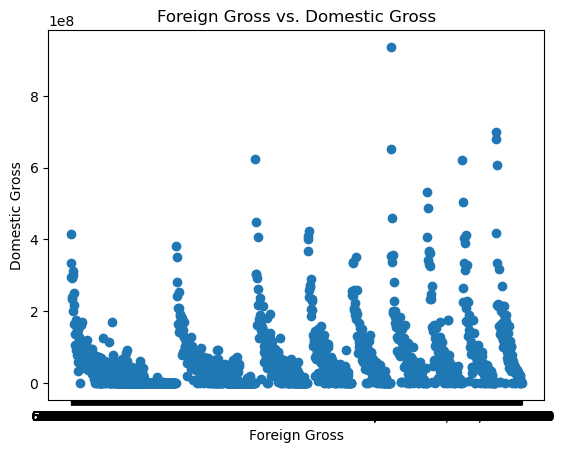

In [46]:
#Reading the csv file to determine the relationship between foreign gross vs. domestic gross
df = pd.read_csv("bom.movie_gross.csv")

#Clean the data and convert the columns to numeric types
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors ='ignore')
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'], errors = 'ignore')

#Drop rows with any missing values
df = df.dropna(subset=['foreign_gross', 'domestic_gross'])

#Create the scatter plot
plt.scatter(df['foreign_gross'], df['domestic_gross'])
plt.xlabel('Foreign Gross')
plt.ylabel('Domestic Gross')
plt.title('Foreign Gross vs. Domestic Gross')
plt.show()

7.Conclusions

The data analysis has provided insights and guidance for improving and hence a better recommendations for the business.The findings have determined the most watched movie is Bluebeard, we have also seen the relationship between domestic and foreign gross.

8.Recommendations

.Correlations of the domestic and foreign gross can yield more revenue to microsoft company and bring more profit.

.The most watched movie is Bluebeard which is a fairy tale, Microsoft should ensure that the movie is accessible to all countries.

.According to the bom movie graph analysis from the second movie which is Before we Go to the tenth shows that there is no competition as they are all on the same level hence the company should focus on quality movie making over quantity.

.They should also promote a healthy competition when making the movies inorder to boost the revenue

.Microsoft should make more movies for all ages as everyone is a target market.
